<a href="https://colab.research.google.com/github/beercafeguy/PyMLLab/blob/master/time_series/FbProphet_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import io, os, sys, setuptools, tokenize

In [7]:
!pip install prophet
import prophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [8]:
import pandas as pd
import matplotlib.pyplot as plt
 
%matplotlib inline

In [13]:
df = pd.read_csv('https://raw.githubusercontent.com/krishnaik06/FbProphet/master/airline_passengers.csv')
df.head()

,Month,Thousands of Passengers
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0


In [14]:
from datetime import datetime,timedelta

In [15]:
df.dropna(inplace=True)
df.tail()

,Month,Thousands of Passengers
139,1960-08,606.0
140,1960-09,508.0
141,1960-10,461.0
142,1960-11,390.0
143,1960-12,432.0


In [17]:
df.columns = ['ds','y']
df.head()

,ds,y
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0


In [19]:
df['ds'] = pd.to_datetime(df['ds'])
df.dtypes

ds    datetime64[ns]
y            float64
dtype: object

In [20]:
from prophet import Prophet

In [21]:
model = Prophet()

In [22]:
model.fit(df)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpq424sgyc/d7355b_o.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpq424sgyc/svrrodoc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=51627', 'data', 'file=/tmp/tmpq424sgyc/d7355b_o.json', 'init=/tmp/tmpq424sgyc/svrrodoc.json', 'output', 'file=/tmp/tmpq424sgyc/prophet_model2zye30yv/prophet_model-20230512034648.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
03:46:48 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
03:46:48 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [23]:
model.component_modes

{'additive': ['yearly',
  'additive_terms',
  'extra_regressors_additive',
  'holidays'],
 'multiplicative': ['multiplicative_terms', 'extra_regressors_multiplicative']}

In [24]:
future_dates = model.make_future_dataframe(periods=365)

In [25]:
prediction = model.predict(future_dates)

In [27]:
prediction.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
504,1961-11-27,520.934753,469.914843,527.862480,520.265025,521.440787,-21.361219,-21.361219,-21.361219,-21.361219,-21.361219,-21.361219,0.0,0.0,0.0,499.573534
505,1961-11-28,521.035587,468.535919,527.088917,520.363640,521.542239,-23.063456,-23.063456,-23.063456,-23.063456,-23.063456,-23.063456,0.0,0.0,0.0,497.972130
506,1961-11-29,521.136420,466.484662,523.065489,520.462256,521.643663,-25.486988,-25.486988,-25.486988,-25.486988,-25.486988,-25.486988,0.0,0.0,0.0,495.649432
507,1961-11-30,521.237254,464.953398,523.537438,520.560966,521.744760,-28.590291,-28.590291,-28.590291,-28.590291,-28.590291,-28.590291,0.0,0.0,0.0,492.646963
508,1961-12-01,521.338087,459.621396,516.986648,520.659894,521.845815,-32.314118,-32.314118,-32.314118,-32.314118,-32.314118,-32.314118,0.0,0.0,0.0,489.023969


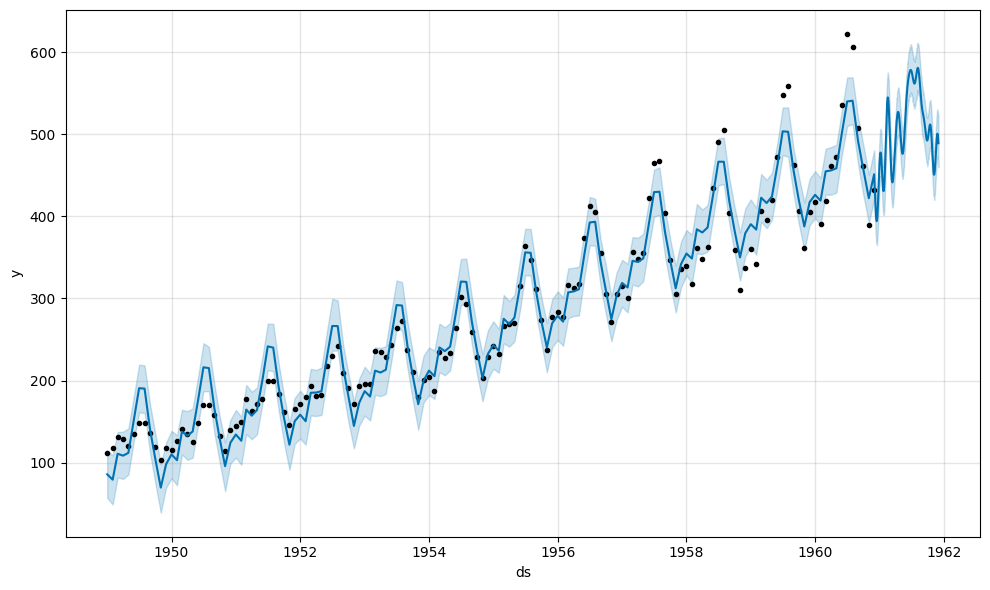

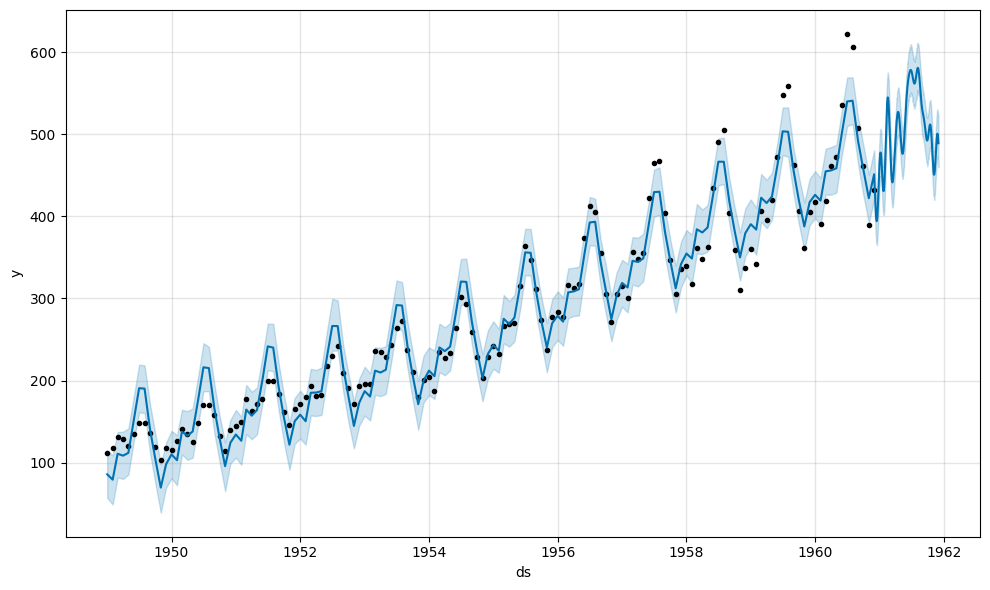

In [29]:
model.plot(prediction)

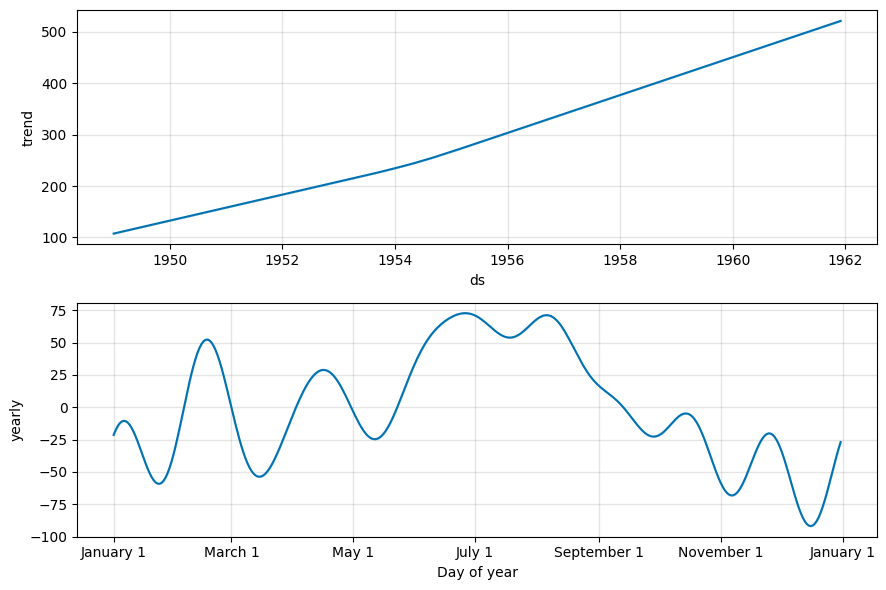

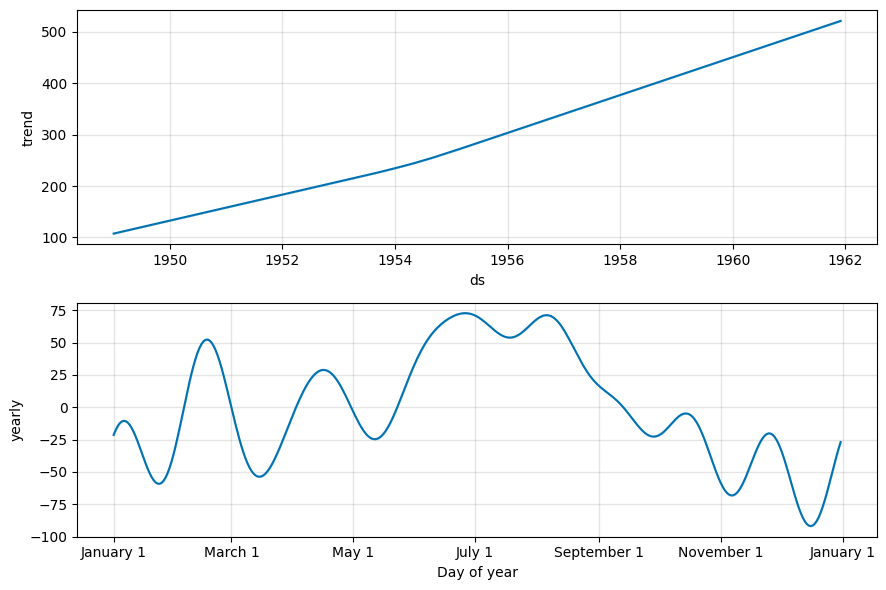

In [30]:
model.plot_components(prediction)